# Tentang Data

data penjualan properti NYC didapat dari Kaggle. kumpulan data ini adalah catatan setiap bangunan atau unit bangunan (apartemen, dll) yang terjual di pasar properti New York City selama periode 12 bulan. dataset ini berisi tentang lokasi, alamat, jenis, harga jual, dan tanggal penjualan unit bangunan yang terjual.

# Import Library

In [102]:
import pandas as pd
import numpy as np
import statistics
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(5,5)})

# Read Dataset

In [103]:
df_nyc = pd.read_csv('D:/Kuliah/Hacktiv8/Sesi/dataset/nyc-rolling-sales.csv')
df_nyc.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


# Exploratory & Cleaning Data

In [104]:
#menghapus kolom yg tidak perlu, krn tdk memiliki nilai

df_nyc.drop(columns=['Unnamed: 0','EASE-MENT', 'APARTMENT NUMBER'], inplace=True)
df_nyc.head(1)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00


In [105]:
df_nyc.shape

(84548, 19)

In [106]:
#ubah nilai pada borough dg nama borough sesuai yg tertera di tugas assignment 2 kode.id

df_nyc['BOROUGH'][df_nyc['BOROUGH'] == 1] = 'Manhattan'
df_nyc['BOROUGH'][df_nyc['BOROUGH'] == 2] = 'Bronx'
df_nyc['BOROUGH'][df_nyc['BOROUGH'] == 3] = 'Brooklyn'
df_nyc['BOROUGH'][df_nyc['BOROUGH'] == 4] = 'Queens'
df_nyc['BOROUGH'][df_nyc['BOROUGH'] == 5] = 'Staten Island'
df_nyc.head()

C:\Users\Isal\AppData\Local\Temp\ipykernel_2636\2631078132.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nyc['BOROUGH'][df_nyc['BOROUGH'] == 1] = 'Manhattan'


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [107]:
df_nyc.columns.values

array(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'], dtype=object)

In [108]:
#melihat tipe data pada kolom

df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  object
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   BUILDING CLASS AT PRESENT       84548 non-null  object
 7   ADDRESS                         84548 non-null  object
 8   ZIP CODE                        84548 non-null  int64 
 9   RESIDENTIAL UNITS               84548 non-null  int64 
 10  COMMERCIAL UNITS                84548 non-null  int64 
 11  TOTAL UNITS                     84548 non-null  int64 
 12  LAND SQUARE FEET                84548 non-null

dari tabel data tersebut, terlihat bahwa ada kolom yang memiliki tipe data yang salah seperti "SALE PRICE" dimana tipe datanya yaitu object yang seharusnya bertipe numeric atau int64. oleh karena itu, perlu dilakukan konversi tipe data pada tiap kolom yang bertipe salah

In [109]:
df_nyc['BOROUGH'] = df_nyc['BOROUGH'].astype('string')
df_nyc['NEIGHBORHOOD'] = df_nyc['NEIGHBORHOOD'].astype('string')
df_nyc['BUILDING CLASS CATEGORY'] = df_nyc['BUILDING CLASS CATEGORY'].astype('category')
df_nyc['TAX CLASS AT PRESENT'] = df_nyc['TAX CLASS AT PRESENT'].astype('category')
df_nyc['BUILDING CLASS AT PRESENT'] = df_nyc['BUILDING CLASS AT PRESENT'].astype('category')
df_nyc['BUILDING CLASS AT PRESENT'] = df_nyc['BUILDING CLASS AT PRESENT'].astype('category')
df_nyc['ADDRESS'] = df_nyc['ADDRESS'].astype('string')
df_nyc['BUILDING CLASS AT PRESENT'] = df_nyc['BUILDING CLASS AT PRESENT'].astype('category')
df_nyc['LAND SQUARE FEET'] = pd.to_numeric(df_nyc['LAND SQUARE FEET'], errors='coerce')
df_nyc['GROSS SQUARE FEET'] = pd.to_numeric(df_nyc['GROSS SQUARE FEET'], errors='coerce')
df_nyc['BUILDING CLASS AT TIME OF SALE'] = df_nyc['BUILDING CLASS AT TIME OF SALE'].astype('category')
df_nyc['SALE PRICE'] = pd.to_numeric(df_nyc['SALE PRICE'], errors='coerce')
df_nyc['SALE DATE'] = pd.to_datetime(df_nyc['SALE DATE'], errors='coerce')

In [110]:
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  string        
 1   NEIGHBORHOOD                    84548 non-null  string        
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            84548 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   BUILDING CLASS AT PRESENT       84548 non-null  category      
 7   ADDRESS                         84548 non-null  string        
 8   ZIP CODE                        84548 non-null  int64         
 9   RESIDENTIAL UNITS               84548 non-null  int64         
 10  COMMERCIAL UNITS                84548 non-null  int64         
 11  TO

setelah dilakukan konversi dengan tipe data yang sesuai, maka akan dilakukan pengecekan apakah ada nilai null pada data tersebut

In [111]:
df_nyc.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

karena "LAND SQUARE FEET", "GROSS SQUARE FEET", dan "BUILDING CLASS AT TIME OF SALE" memiliki nilai null. maka akan dilakukan cleaning data agar data pada ketiga kolom tersebut dapat digunakan.

In [112]:
df_nyc = df_nyc[df_nyc['GROSS SQUARE FEET'].notnull()]
df_nyc = df_nyc[df_nyc['SALE PRICE'].notnull()]
df_nyc = df_nyc[df_nyc['LAND SQUARE FEET'].notnull()]
df_nyc.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

setelah dilakukan cleaning data sudah tidak terdapat nilai null lagi, sehingga langkah selanjutnya menghitung jumlah datanya

In [113]:
df_nyc.shape

(48244, 19)

Setelah dilakukan cleaning data pada nilai null, jumlah data sekarang ada sebanyak 48244 dimana sebelumnya berjumlah 84548. sehingga data ini dapat digunakan dibandingkan data sebelumnya yang kemungkinan terdapat kesalahan penginputan data, data tercorrupt, dan sebagainya yang membuat hasil nanti menjadi tidak akurat. sekarang akan dilakukan pengecekan statistik sederhananya.

In [114]:
df_nyc.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07


# A. Measure of Central Tendency : Mean

**Question**

Berapakah harga rata-rata tertinggi properti dari 5 wilayah?

**Pre-processing**

In [115]:
#buat pivot table dengan index 'BOROUGH', values 'SALE PRICE' dan aggfunc=np.mean
#dimana np.mean akan menghitung nilai rata-rata

df_mean = df_nyc.pivot_table(
    index='BOROUGH', 
    values='SALE PRICE', 
    aggfunc=np.mean
)

#sename kolom 'SALE PRICE' menjadi 'MEAN SALE PRICE'
df_mean.rename(columns={'SALE PRICE':'MEAN SALE PRICE'}, inplace=True)

#sort df berdasarkan kolom 'MEAN SALE PRICE'
df_mean.sort_values('MEAN SALE PRICE', ascending=False, inplace=True)

In [116]:
#tampilkan tabel
df_mean.head()

,MEAN SALE PRICE
BOROUGH,
Manhattan,1.851722e+07
Queens,9.123055e+05
Brooklyn,8.344884e+05
Bronx,5.901936e+05
Staten Island,5.286038e+05


**Conclusion**

berdasarkan tabel diatas, terlihat ada 5 wilayah yaitu Manhattan, Queens, Brooklyn, Bronx, dan Staten Island yang memiliki harga rata-rata properti tertinggi dengan harga sebagai berikut:

1. Manhattan = \\$18,517,220
2. Queens = \\$912,305,5
3. Brooklyn = \\$834,488,4
4. Bronx = \\$590,193,6
5. State Island = $528,603,8

# B. Measure of Central Tendency : Median

**Question**

5 alamat manakah yang memiliki nilai median tertinggi harga properti?

**Pre-processing**

In [117]:
#buat pivot table dengan index 'ADDRESS', values 'SALE PRICE' dan aggfunc=np.median
#dimana np.median akan menghitung nilai median

df_median = df_nyc.pivot_table(
    index='ADDRESS', 
    values='SALE PRICE', 
    aggfunc=np.mean
)

#rename kolom 'SALE PRICE' menjadi 'MEDIAN SALE PRICE'
df_median.rename(columns={'SALE PRICE':'MEDIAN SALE PRICE'}, inplace=True)

#sort df berdasarkan kolom 'MEDIAN SALE PRICE'
df_median.sort_values('MEDIAN SALE PRICE', ascending=False, inplace=True)

In [118]:
#tampilkan tabel
df_median.head()

,MEDIAN SALE PRICE
ADDRESS,
245 PARK AVENUE,2.210000e+09
60 WALL STREET,1.040000e+09
85 BROAD STREET,6.520000e+08
460-520 2ND AVENUE,6.200000e+08
1250 BROADWAY,5.650000e+08


**Conclusion**

berdasarkan tabel diatas, terlihat ada 5 alamat yaitu 245 Park Avenue, 60 Wall Street, 85 Broad Street, 460-520 2ND Avenue, dan 1250 Broadway yang memiliki nilai median harga properti tertinggi sebagai berikut:

1. 245 Park Avenue = \\$2,210,000,000
2. 60 Wall Street = \\$1,040,000,000
3. 85 Broad Street = \\$652,000,000
4. 460-520 2ND Avenue = \\$620,000,000
5. 1250 Broadway = $565,000,000

# C. Measure of Central Tendency : Mode

**Question**

Kategori kelas properti apa yang sering terjual di setiap wilayah Queens?

In [119]:
#pilih borough
queens = df_nyc[(df_nyc['BOROUGH'] == "Queens")]

In [120]:
#buat pivot table dengan index 'BOROUGH', values 'BUILDING CLASS CATEGORY' dan aggfunc=stats.mode
#dimana np.mode akan menghitung nilai modus
df_mode = queens.pivot_table(
    index='BOROUGH', 
    values='BUILDING CLASS CATEGORY', 
    aggfunc=stats.mode
)

#tampilkan tabel
df_mode

,BUILDING CLASS CATEGORY
BOROUGH,
Queens,([01 ONE FAMILY DWELLINGS ]...


**Conclusion**

berdasarkan tabel diatas, terlihat bahwa kelas properti yang sering terjual di wilayah Queens adalah "01 ONE FAMILY DWELLINGS"

# D. Measure of Spread : Range

**Question**

Berapa range harga properti termurah dan termahal dari 5 wilayah berdasarkan penjualan tahun 2017?

**Pre-processing**

In [121]:
#buat kolom bernama 'SALE YEAR' dan isi dengan year pada kolom 'SALE DATE'
df_nyc['SALE YEAR'] = pd.DatetimeIndex(df_nyc['SALE DATE']).year

In [122]:
#pilih tahun 2010
y2017 = df_nyc[(df_nyc['SALE YEAR'] == 2017)]

In [123]:
#buat pivot table dengan index 'BOROUGH', values 'SALE PRICE' dan aggfunc=np.ptp
#dimana np.ptp akan menghitung nilai range
df_range = y2010.pivot_table(
    index='BOROUGH', 
    values='SALE PRICE', 
    aggfunc=np.ptp
)

#rename kolom 'SALE PRICE' menjadi 'RANGE SALE PRICE'
df_range.rename(columns={'SALE PRICE':'RANGE SALE PRICE'}, inplace=True)

#sort df berdasarkan kolom 'RANGE SALE PRICE'
df_range.sort_values('RANGE SALE PRICE', ascending=False, inplace=True)

In [124]:
#tampilkan tabel
df_range.head()

,RANGE SALE PRICE
BOROUGH,
Manhattan,2.210000e+09
Brooklyn,1.600000e+08
Queens,1.398749e+08
Bronx,8.637500e+07
Staten Island,1.190000e+07


**Conclusion**

berdasarkan tabel diatas, terlihat range harga properti termurah dan termahal dari 5 wilayah berdasarkan penjualan tahun 2017 sebagai berikut:

1. Manhattan = \\$2,210,000,000
2. Bronx = \\$160,000,000
3. State Island = \\$139,874,900
4. Brooklyn = \\$86,375,000
5. Queens = $11,900,000

# E. Measure of Spread : Variance

**Question**

Berapa variance harga properti berdasarkan tahun penjualannya?

**Pre-processing**

In [125]:
df_variance = df_nyc

#buat kolom bernama 'SALE YEAR' dan isi dengan year pada kolom 'SALE DATE'
df_variance['SALE YEAR'] = pd.DatetimeIndex(df_variance['SALE DATE']).year

#buat pivot table dengan index 'SALE YEAR'', values 'SALE PRICE' dan aggfunc=statistics.variance
#dimana statistics.variance akan menghitung ilai variance dari 'SALE PRICE' berdasarkan 'SALE YEAR'
df_variance = df_nyc.pivot_table(
    index='SALE YEAR', 
    values='SALE PRICE', 
    aggfunc=statistics.variance
)

#rename kolom 'SALE PRICE' menjadi ' VARIANCE SALE PRICE'
df_variance.rename(columns={'SALE PRICE':' VARIANCE SALE PRICE'}, inplace=True)

In [126]:
#tampilkan tabel
df_variance.head()

,VARIANCE SALE PRICE
SALE YEAR,
2016,9.569459e+13
2017,2.254478e+14


**Conclusion**

berdasarkan tabel diatas, terlihat bahwa variance harga properti pada tahun 2016 adalah 9.569459e+13 sedangkan tahun 2017 yaitu 2.254478e+14.

# F. Measure of Spread : Standard Deviation

**Question**

Berapa standard deviasi harga properti berdasarkan tahun penjualannya?

**Pre-processing**

In [127]:
df_std = df_nyc

#buat kolom bernama 'SALE YEAR' dan isi dengan year pada kolom 'SALE DATE'
df_std['SALE YEAR'] = pd.DatetimeIndex(df_std['SALE DATE']).year

#buat pivot table dengan index 'SALE YEAR'', values 'SALE PRICE' dan aggfunc=statistics.stdev
#dimana statistics.stdev akan menghitung nilai standard deviasi dari 'SALE PRICE' berdasarkan 'SALE YEAR'
df_std = df_std.pivot_table(
    index='SALE YEAR', 
    values='SALE PRICE', 
    aggfunc=statistics.stdev
)

#rename kolom 'SALE PRICE' menjadi 'STD SALE PRICE'
df_std.rename(columns={'SALE PRICE':' STD SALE PRICE'}, inplace=True)

In [128]:
#tampilkan tabel
df_std.head()

,STD SALE PRICE
SALE YEAR,
2016,9.782361e+06
2017,1.501492e+07


**Conclusion**

berdasarkan tabel diatas, terlihat bahwa standar deviasi harga properti pada tahun 2016 adalah 9.782361e+06 sedangkan tahun 2017 yaitu 1.501492e+07.

# G. Probability Distributions

**Question**

Bagaimana bentuk distribusi harga properti diantara \\$1,000,000 - \\$7,000,000 yang terjual pada tahun 2016?

**Pre-processing**

In [129]:
df_pd = df_nyc

#buat kolom bernama 'SALE YEAR' dan isi dengan year pada kolom 'SALE DATE'
df_pd['SALE YEAR'] = pd.DatetimeIndex(df_pd['SALE DATE']).year

#Memfilter data dimana kolom 'SALE YEAR' yang diambil harus bernilai 2017, kolom 'SALE PRICE' yang diambil harus diantara sama dengan 1000000 - 5000000
df_pd = df_pd[
    (df_pd['SALE YEAR'] == 2016) & 
    (df_pd['SALE PRICE'] >= 1000000) &
    (df_pd['SALE PRICE'] <= 7000000)
]['SALE PRICE']

In [130]:
#mencari harga tertinggi
mode = statistics.mode(df_pd)
mode

1300000.0

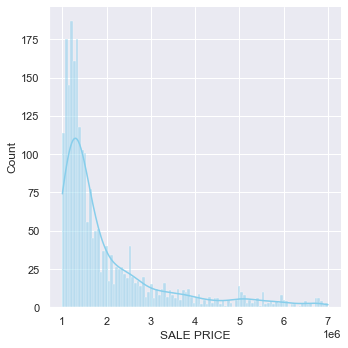

In [131]:
#grafik distribusi
ax = sns.displot(
    df_pd,
    kde=True,
    bins=100,
    color='skyblue')

**Conclusion**

berdasarkan grafik distribusi diatas, terlihat bahwa grafik distirbusi tersebut menggambarkan distribusi eksponensial dan ingin dicari banyaknya properti terjual berdasarkan harga pada tahun 2016. didapat hasil grafik properti dengan harga \\$1,300,000 memiliki jumlah terjual paling tinggi, kemudian dari harga $1,300,000 - \\$7,000,000 memiliki jumlah terjual emakin menurun, sehingga dapat disimpulkan bahwa semakin mahal harga properti maka semakin sedikit jumlah properti yang terjual.

# H. Confidence Intervals

**Question**

Berapakah true mean harga properti di wilayah Manhattan?

**Pre-processing**

In [132]:
#cari mean, standar deviasi, dan size dari 'SALE PRICE' berdasarkan 'BOROUGH'
df_ci = df_nyc.groupby('BOROUGH').agg({'SALE PRICE':[np.mean, np.std, np.size]})

In [133]:
mean = df_ci.loc['Manhattan']['SALE PRICE']['mean'] #cari nilai mean pada Manhattan
sd = df_ci.loc['Manhattan']['SALE PRICE']['std'] #cari nilai standar deviasi pada Manhattan
n = df_ci.loc['Manhattan']['SALE PRICE']['size'] #cari nilai size pada Manhattan
z = 1.96 #tingkat kepercayaan sebesar 95%

#mencari standar error
se = sd / np.sqrt(n)

#mencari CI
lcb = mean - z * se
ucb = mean + z * se
lcb,ucb

(13082977.472065415, 23951462.881811325)

**Conclusion**

berdasarkan output diatas, terlihat bahwa true mean harga properti di wilayah Manhattan berada diantara \\$13,082,977 - \\$23,951,462.

# I. Hypothesis Testing

**Question**

Apakah wilayah Brooklyn memiliki rata-rata harga properti yang lebih tinggi dibandingkan wilayah Queens?\
H0: μ1 = μ2\
H1: μ1 ≠ μ2

**Pre-processing**

In [134]:
#pilih borough
df_manhattan = df_nyc[df_nyc['BOROUGH'] == 'Brooklyn']
df_queens = df_nyc[df_nyc['BOROUGH'] == 'Queens']

#cari mean dan standar deviasi dari Manhattan
n1 = len(df_manhattan)
mu1 = df_manhattan['SALE PRICE'].mean()
sd1 = df_manhattan['SALE PRICE'].std()

#cari mean dan standar deviasi dari Queens
n2 = len(df_queens)
mu2 = df_queens['SALE PRICE'].mean()
sd2 = df_queens['SALE PRICE'].std()

 
sm.stats.ztest(df_manhattan['SALE PRICE'], df_queens['SALE PRICE'], alternative='two-sided')

(-1.751336483996908, 0.07988796676258987)

berdasarkan hasil output diatas, terlihat bahwa p-value > alpha (0.07988796676258987 > 0.05) sehingga tidak tolak H0. jadi, dapat disimpulkan bahwa wilayah Brooklyn tidak memiliki rata-rata harga properti yang lebih tinggi dibandingkan wilayah Queens.

# Overall Analysis

dari hasil statistik yang telah dibahas, dapat disimpulkan sebagai berikut:
1. wilayah Manhattan memiliki harga properti tertinggi
2. lokasi alamat di 245 PARK AVENUE memiliki harga properti tertinggi
3. rata-rata harga properti wilayah Brooklyn tidak jauh lebih tinggi dengan wilayah Queens
4. pada tahun 2016, properti dengan harga \\$1,300,000 memiliki jumlah terjual paling tinggi
5. semakin mahal harga properti maka semakin sedikit jumlah properti yang terjual